## Importing the Liabraries and the Data

In [3]:
# importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [4]:
# importing the data
pres = pd.read_csv("opioid_prescription.csv")

In [5]:
# calling the data
pres

,NPI,Gender,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,Internal Medicine,0,43,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,Hematology/Oncology,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,1619019353,F,WA,Family Practice,0,12,0,0,0,46,...,0,0,0,0,39,0,0,0,0,1
24755,1780693671,F,MI,Internal Medicine,0,15,0,0,0,0,...,0,0,0,0,20,0,0,0,0,1
24756,1346270956,M,AZ,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24757,1023116514,F,IN,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
# checking the number of rows and columns in the data
pres.shape

(24759, 255)

## Data Preparation

In [7]:
# to check the total count of missing values in the data set.
pres.isnull().sum().sum()

np.int64(5)

In [8]:
# to check the number of missing values by each column
pres.isnull().sum()

NPI                  0
Gender               0
State                0
Specialty            5
ABILIFY              0
                    ..
XARELTO              0
ZETIA                0
ZIPRASIDONE.HCL      0
ZOLPIDEM.TARTRATE    0
Opioid.Prescriber    0
Length: 255, dtype: int64

In [9]:
pres.Specialty.value_counts()

Specialty
Internal Medicine                  3162
Family Practice                    2967
Dentist                            2771
Nurse Practitioner                 2511
Physician Assistant                1838
                                   ... 
Midwife                               1
Licensed Clinical Social Worker       1
Community Health Worker               1
Pharmacy Technician                   1
Behavioral Analyst                    1
Name: count, Length: 106, dtype: int64

In [10]:
# replacing the null value in Specialty- using the most frequent Specialty to replace the missing value
pres.Specialty.replace(np.nan, 'Internal Medicine', inplace=True)

C:\Users\okemi\AppData\Local\Temp\ipykernel_18748\280954673.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pres.Specialty.replace(np.nan, 'Internal Medicine', inplace=True)


In [11]:
# confirming the null values again
pres.isnull().sum()

NPI                  0
Gender               0
State                0
Specialty            0
ABILIFY              0
                    ..
XARELTO              0
ZETIA                0
ZIPRASIDONE.HCL      0
ZOLPIDEM.TARTRATE    0
Opioid.Prescriber    0
Length: 255, dtype: int64

## Data Exploration

In [12]:
# This shows the percentage of practitioners within various specialties that are flagged as overprescribers
round(((pres['Opioid.Prescriber'].value_counts(normalize=True))*100),2)

Opioid.Prescriber
1    58.72
0    41.28
Name: proportion, dtype: float64

In [13]:
# This shows the percenatge of gender that has been addidicted to Opioid drugs
pres.groupby('Gender')['Opioid.Prescriber'].mean().reset_index().sort_values('Opioid.Prescriber', ascending=False)

,Gender,Opioid.Prescriber
1,M,0.613211
0,F,0.544377


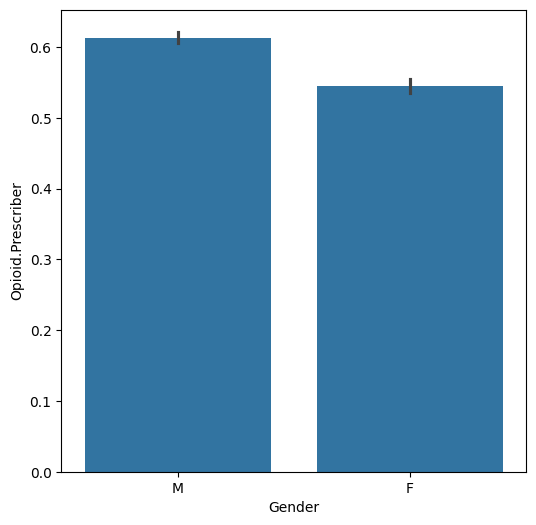

In [14]:
fig, ax = plt.subplots(figsize=(6, 6))
sb.barplot(data = pres, x='Gender', y='Opioid.Prescriber')
plt.show()

In [15]:
# this shows the Specialty that has the highest rate of over prescrption of Opioid. 
Specialty_Percent = pres.groupby('Specialty')['Opioid.Prescriber'].mean().reset_index().sort_values('Opioid.Prescriber', ascending=False).head(20)
Specialty_Percent

,Specialty,Opioid.Prescriber
15,Community Health Worker,1.000000
12,Clinical Pharmacology,1.000000
32,Hand Surgery,1.000000
33,Health Maintenance Organization,1.000000
83,Preferred Provider Organization,1.000000
101,Surgical Oncology,1.000000
69,Orthopedic Surgery,0.986014
72,Pain Management,0.963636
21,Emergency Medicine,0.962072
42,Interventional Pain Management,0.956522


In [16]:
# The result gotten above filter out 1.0(100%) because the specialty with 100% can't be the specialty that has the highest rate of over 
# prescrption because of the limited data available for those specialties.
Specialty_Percent = Specialty_Percent[Specialty_Percent['Opioid.Prescriber'] < 1.0]
Specialty_Percent

,Specialty,Opioid.Prescriber
69,Orthopedic Surgery,0.986014
72,Pain Management,0.963636
21,Emergency Medicine,0.962072
42,Interventional Pain Management,0.956522
47,Maxillofacial Surgery,0.944444
50,Medical Oncology,0.928571
93,Rheumatology,0.923077
35,Hematology/Oncology,0.915888
29,Geriatric Medicine,0.915254
80,Plastic Surgery,0.909091


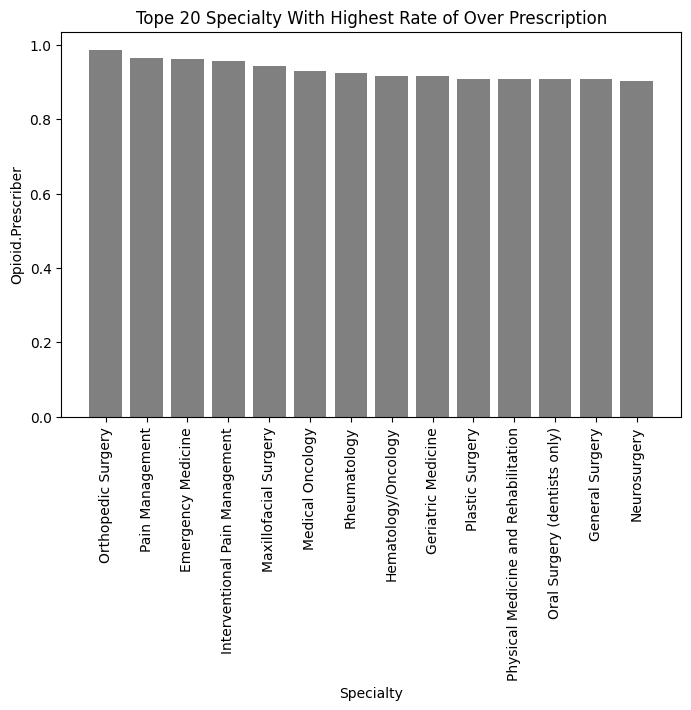

In [17]:
plt.figure(figsize=(8, 5))
x=Specialty_Percent['Specialty']
y=Specialty_Percent['Opioid.Prescriber']
plt.bar(x, y, color='grey')
plt.xlabel('Specialty')
plt.ylabel('Opioid.Prescriber')
plt.title('Tope 20 Specialty With Highest Rate of Over Prescription')
plt.xticks(rotation=90)
plt.show()

In [18]:
# This shows the highest rate of over prescrption of Opioid in a state. 
State_Percent=pres.groupby('State')['Opioid.Prescriber'].mean().reset_index().sort_values('Opioid.Prescriber', ascending=False).head(20)
State_Percent

,State,Opioid.Prescriber
2,AR,0.736111
36,OK,0.729537
26,MT,0.714286
1,AL,0.709302
33,NV,0.696774
0,AK,0.692308
25,MS,0.673575
13,ID,0.661654
40,SC,0.661538
44,UT,0.660494


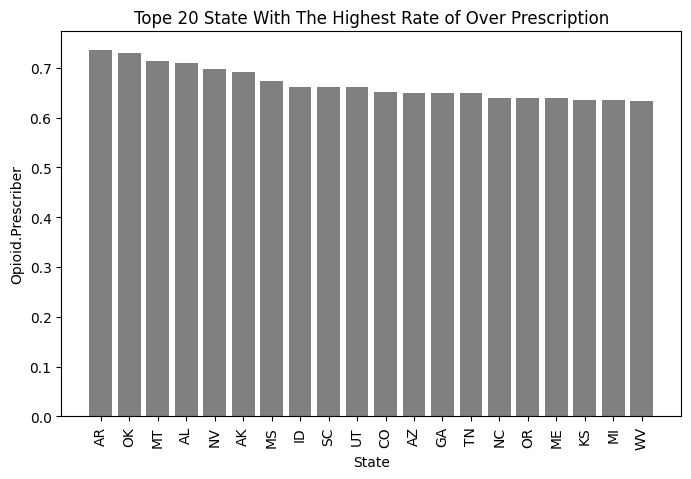

In [19]:
plt.figure(figsize=(8, 5))
x=State_Percent['State']
y=State_Percent['Opioid.Prescriber']
plt.bar(x, y, color='grey')
plt.xlabel('State')
plt.ylabel('Opioid.Prescriber')
plt.title('Tope 20 State With The Highest Rate of Over Prescription')
plt.xticks(rotation=90)
plt.show()

In [20]:
# To check the correclation between the drugs and the target variable (Opioid.Prescriber) in order to know which drugs
# that are frequently prescribes. The drug with the highest correlation is more prescribe frequently.
drugs = pres.columns[4:-1]
corr = pres[drugs].corrwith(pres['Opioid.Prescriber']).sort_values(ascending=False).to_frame(name='Correlation').reset_index().head(10)
corr.columns = ['Drug', 'Correlation']
corr

,Drug,Correlation
0,TRAMADOL.HCL,0.288115
1,HYDROCODONE.ACETAMINOPHEN,0.267318
2,HYDROCHLOROTHIAZIDE,0.262988
3,METFORMIN.HCL,0.260895
4,SIMVASTATIN,0.257441
5,LEVOTHYROXINE.SODIUM,0.256933
6,GABAPENTIN,0.253419
7,LISINOPRIL,0.250561
8,OMEPRAZOLE,0.244708
9,AMLODIPINE.BESYLATE,0.243036


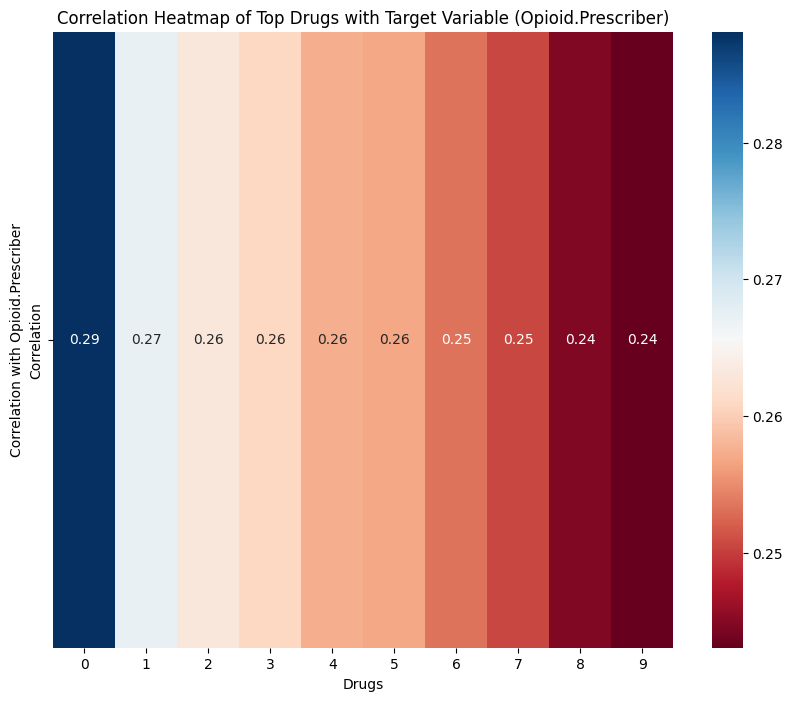

In [21]:
# Correlation Diagram
corr_values = corr[['Correlation']].transpose()
plt.figure(figsize=(10, 8))
sb.heatmap(corr_values, annot=True, cmap='RdBu')

plt.title("Correlation Heatmap of Top Drugs with Target Variable (Opioid.Prescriber)")
plt.xlabel('Drugs')
plt.ylabel('Correlation with Opioid.Prescriber')
plt.show()

## Data Modelling

In [22]:
# Import the classification algorithm and necessary libaries for Data Modelling

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split # to split the dataset into test and train variable
from sklearn.preprocessing import LabelEncoder # this convert the string data to numeric or  binary

In [23]:
pres

,NPI,Gender,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,1710982582,M,TX,Dentist,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1245278100,F,AL,General Surgery,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,1427182161,F,NY,General Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,1669567541,M,AZ,Internal Medicine,0,43,0,0,0,21,...,0,0,0,0,0,0,0,0,0,1
4,1679650949,M,NV,Hematology/Oncology,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24754,1619019353,F,WA,Family Practice,0,12,0,0,0,46,...,0,0,0,0,39,0,0,0,0,1
24755,1780693671,F,MI,Internal Medicine,0,15,0,0,0,0,...,0,0,0,0,20,0,0,0,0,1
24756,1346270956,M,AZ,Emergency Medicine,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
24757,1023116514,F,IN,Family Practice,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
# dropping NPI from the data which cannot be part our prediction
opioid_drugs = pres.drop('NPI', axis=1)

In [25]:
opioid_drugs.head()

,Gender,State,Specialty,ABILIFY,ACETAMINOPHEN.CODEINE,ACYCLOVIR,ADVAIR.DISKUS,AGGRENOX,ALENDRONATE.SODIUM,ALLOPURINOL,...,VERAPAMIL.ER,VESICARE,VOLTAREN,VYTORIN,WARFARIN.SODIUM,XARELTO,ZETIA,ZIPRASIDONE.HCL,ZOLPIDEM.TARTRATE,Opioid.Prescriber
0,M,TX,Dentist,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,F,AL,General Surgery,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,35,1
2,F,NY,General Practice,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,25,0
3,M,AZ,Internal Medicine,0,43,0,0,0,21,0,...,0,0,0,0,0,0,0,0,0,1
4,M,NV,Hematology/Oncology,0,0,0,0,0,0,0,...,0,0,0,0,17,28,0,0,0,1


In [26]:
# converting the categorical to numeric or binary

le= LabelEncoder()
opioid_drugs['Gender'] = le.fit_transform(opioid_drugs['Gender'])
opioid_drugs['State'] = le.fit_transform(opioid_drugs['State'])
opioid_drugs['Specialty'] = le.fit_transform(opioid_drugs['Specialty'])

In [27]:
# Assigning the variable to X and Y
X = opioid_drugs.drop('Opioid.Prescriber', axis=1)
Y = opioid_drugs['Opioid.Prescriber']

In [28]:
# Splitting the dataset into test and train varaible
# X- variables - predictors, the features that helps to predicct the target variable
# Y- target variable
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [29]:
# fit in the model

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, Y_train) # to train the data

RandomForestClassifier(random_state=42)

In [30]:
# Prediction of X_test
Y_preds = clf.predict(X_test)
Y_preds

array([0, 1, 0, ..., 0, 0, 1])

In [31]:
# checking the key metrix of the model - the metrix gives us a breakdown of the performance of the model

from sklearn.metrics import confusion_matrix, accuracy_score

#### Accuracy Score

In [32]:
print(f"Accuracy Score: {accuracy_score(Y_test, Y_preds):.2f}")

Accuracy Score: 0.92


#### Confusion Matrix

In [33]:
# this gives the prediction summary in matrix i.e it helps us to summarizes the performance of a classification model by comparing 
# its predicted labels to the true labels

cm = confusion_matrix(Y_test, Y_preds, labels=[0, 1])
cm

array([[1938,  113],
       [ 259, 2642]])

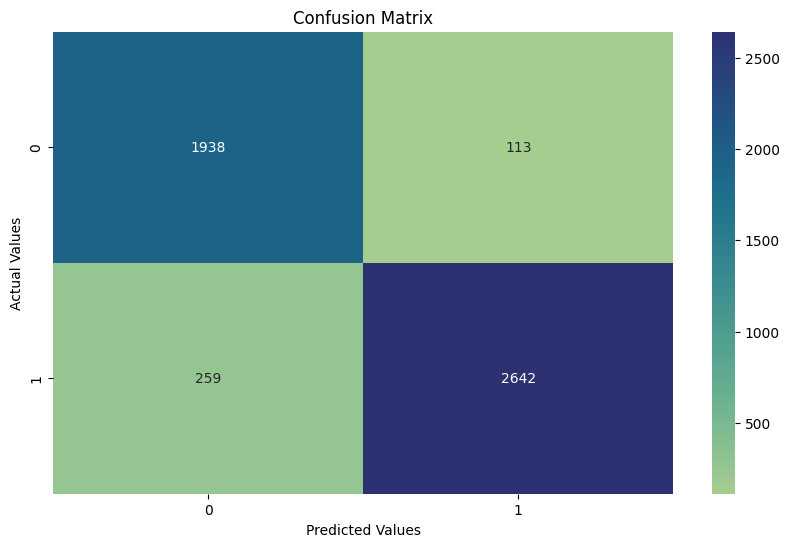

In [34]:
plt.figure(figsize=(10, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='crest')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

In [35]:
tn, fp, fn, tp = cm.ravel()

#### Precision Score

In [36]:
# when we predict something positive how many true positives do we have in our predictions.

precision = round(tp / (tp + fp),2)
print(f"Precision_Score: {precision}")

Precision_Score: 0.96


#### Sensitivity/Recall Score

In [37]:
# sensitivity measures how well a model can identify positive cases.
# is the number of true positives divided by all actual postivies
recall = round(tp / (tp + fn),2)
print(f"Recall_Score: {recall}")

Recall_Score: 0.91


#### Sepcificity Score

In [38]:
# specificity measures how well a model can identify negative cases.
# it is the number of true negatives divided by all actual negatives

specificity = round(tn/ (tn + fp),2)
print(f"Specificity_Score: {specificity}")

Specificity_Score: 0.94


#### f1-score

In [39]:
# F1 score is a metric that measures a model's performance by evaluating the balance between its precision and recall. 
# it is the weighted harmonic mean of precision and recall.
# when the result of the f1-score is close to 1, the better the model.

f1_score = round(2 * ((recall * precision) / (recall + precision)),2)
print(f"F1_Score: {f1_score}")

F1_Score: 0.93


#### Feature Importance

In [40]:
#This helps to know which column influences or contribute more to the prediction
# The feature importance helps us to know the features/variable that contribute more to overprescribing of Opioids predictions and the results
# are the different factors which affect the likelihood of a doctor over prescribing.

In [41]:
f_list = list(X.columns)
f_importance = round(pd.Series(clf.feature_importances_, index = f_list).sort_values(ascending = False),4)
f_importance.head(15)

HYDROCODONE.ACETAMINOPHEN    0.2632
TRAMADOL.HCL                 0.0741
OXYCODONE.ACETAMINOPHEN      0.0667
State                        0.0325
Specialty                    0.0312
OXYCODONE.HCL                0.0310
ACETAMINOPHEN.CODEINE        0.0195
PREDNISONE                   0.0171
CIPROFLOXACIN.HCL            0.0149
AMOXICILLIN                  0.0144
LEVOTHYROXINE.SODIUM         0.0129
OMEPRAZOLE                   0.0128
GABAPENTIN                   0.0126
MELOXICAM                    0.0124
METFORMIN.HCL                0.0119
dtype: float64